In [124]:
from collections import *
from numpy import *
import numpy as np
import csv
import sys
import json
import re
import nltk.data
import string
import sklearn.cluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xml.etree.ElementTree as ET
import sklearn.decomposition
from tsne import *
import song_parsing
import collections
import sklearn.feature_extraction.text
from sklearn.decomposition import PCA
csv.field_size_limit(sys.maxsize);

In [125]:
def get_all_words_and_word_counts(songs):
    all_words = set([])
    song_counters = {}
    for song in songs:
        words = []
        for line in songs[song].split('\n'):
            line = line.translate(None, string.punctuation)
            words.extend(line.replace('"', '').split(' '))

        counter = collections.Counter(words)
        song_counters[song] = counter
        all_words = all_words.union( counter.iterkeys() )

    length = len(all_words)
    all_words = sorted(all_words)
    return all_words, song_counters
    
def get_all_representations_as_matrix(songs, song_counters):
    all_song_representations = [[] for i in range(len(songs))]
    for word in all_words:
        for song_index, song in enumerate(songs):
            all_song_representations[song_index].append(song_counters[song[0]][word] * 1.0) 
    return all_song_representations
    
def get_clusters(songs):
    all_words, song_counters = get_all_words_and_word_counts(songs)
    songs = list(songs.iteritems())

    N_CLUSTERS = 5
    clusterer = sklearn.cluster.KMeans(n_clusters=N_CLUSTERS, max_iter=500) #make max_iter higher later

    all_song_representations = get_all_representations_as_matrix(songs, song_counters)
    pca = PCA(n_components=1000)
    all_song_representations = np.array(all_song_representations) # as NP array
    all_song_representations = np.array(pca.fit_transform(all_song_representations)) #linear dimensionality reduction
    cluster_labels = clusterer.fit_predict(all_song_representations)
    
    clusters = {}
    for song_index, cluster in enumerate(cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = []
        else:
            clusters[cluster].append(songs[song_index][0])
    return all_song_representations, clusters, cluster_labels

In [126]:
songs = song_parsing.get_all_song_lyrics("Taylor Swift")
all_song_representations, clusters, cluster_labels = get_clusters(songs)

In [127]:
pca2 = PCA(n_components=2)
t = pca2.fit_transform(all_song_representations)

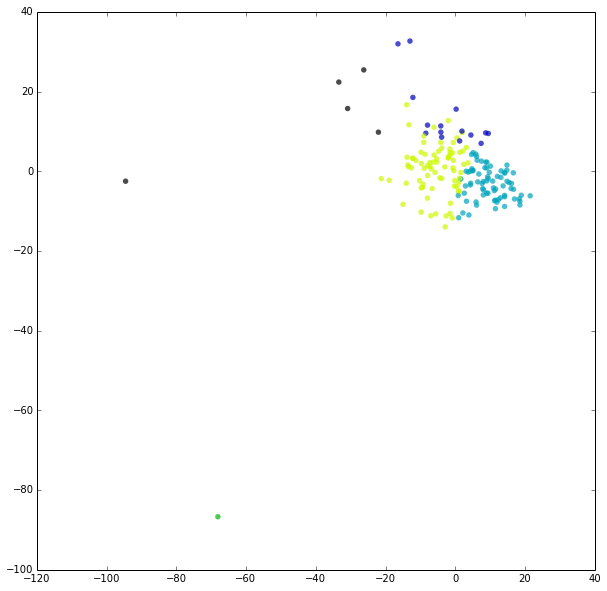

In [128]:
%matplotlib inline
plt.figure(figsize=(10,10))
colors = cm.spectral(cluster_labels.astype(float) / N_CLUSTERS)
plt.scatter(t[:, 0], t[:, 1], marker='.', s=120, lw=0, alpha=0.7, c=colors)
plt.show()

In [119]:
print collections.Counter(cluster_labels)
for cluster in clusters:
    print clusters[cluster]

Counter({1: 76, 7: 65, 2: 16, 0: 6, 5: 3, 6: 2, 9: 2, 3: 1, 4: 1, 8: 1})
['Long Live', 'We Were Happy', 'Wonderland', 'Starlight', 'Out Of The Woods']
['Long Time Coming', 'Stay Stay Stay', 'One Way Ticket', 'Breathe', '22', 'Spinning Around', 'If This Was A Movie', 'Back To December', 'Writing Songs About You', 'Begin Again', 'The Lucky One', 'The Way I Loved You', 'Last Kiss', 'Am I Ready For Love', 'I Heart ?', 'Til Brad Pitt Comes Along', 'Wait For Me', 'Come Back... Be Here', 'The Moment I Knew', 'Riptide', 'Teardrops On My Guitar', 'Love Story', 'One Thing', 'You Are In Love', 'Cross My Heart', 'Blank Space', 'Speak Now', 'Girl At Home', 'Fifteen', 'You Belong With Me', 'Dear John', 'I Know Places', 'Sweeter Than Fiction', 'Viva La Vida', 'The Story Of Us', 'This Love', 'Just South Of Knowing Why', "Baby, Don't You Break My Heart Slow", 'The Best Day', 'Superman', "Who I've Always Been", 'Forever & Always (Piano Version)', 'Welcome Distraction', 'Thug Story', 'Ten Dollars And A S